PHYS 514 -- PS#6 -- Problem 20 -- Tevfik Can Yüce, 64065

In [1]:
#Importin Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.integrate import solve_ivp
from scipy.special import lambertw
import ps6_functions

Part (a):

In [22]:
#Function for plotting results
def plot_solution(solution, analytical_solution, delta, method, jac):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(17,6)

    ax[0].plot(np.squeeze(solution.t), np.squeeze(solution.y))
    ax[0].plot(solution.t , analytical_solution(solution.t, delta), '--')
    ax[0].set_xlabel('tau')
    ax[0].set_ylabel('rho')
    ax[0].legend(['Integrated','Analytical'])
    ax[0].set_title('Analytical and Integrated Solution for method ' + method + ' delta=' +str(delta) + ' jacob=' + str(jac))

    ax[1].semilogy(solution.t, np.abs(np.squeeze(solution.y)-np.squeeze(analytical_solution(solution.t, delta))))
    ax[1].set_xlabel('tau')
    ax[1].set_ylabel('Err')
    ax[1].set_title('Error for method ' + method + ' delta=' + str(delta) + ' jacob=' + str(jac))
    
    plt.show()

d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


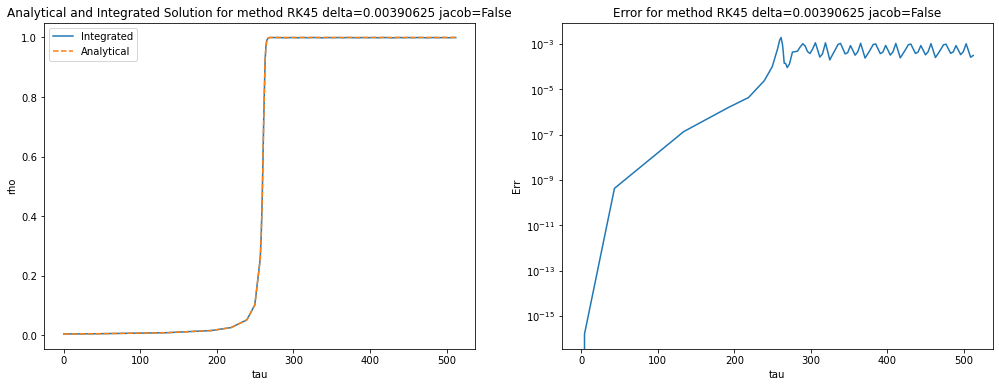

Solution Time = 0.026879310607910156
Number of Eval of RHS = 698
Number of Eval of Jacob = 0
Number of LU Decomp = 0


d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


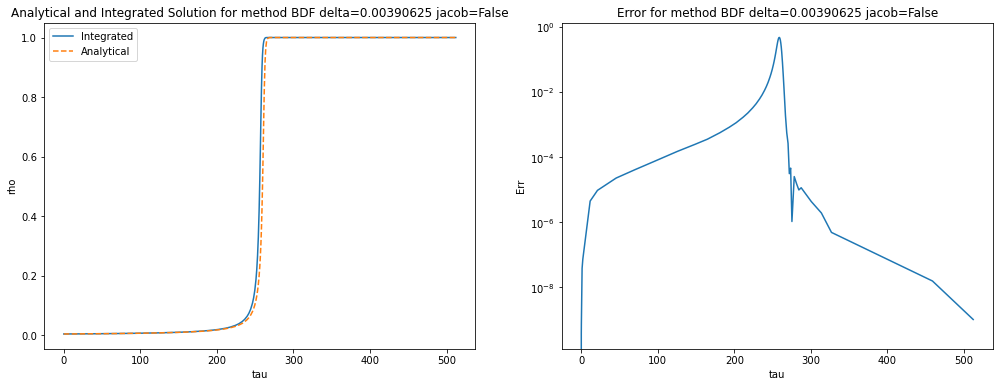

Solution Time = 0.03882884979248047
Number of Eval of RHS = 218
Number of Eval of Jacob = 4
Number of LU Decomp = 15


d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


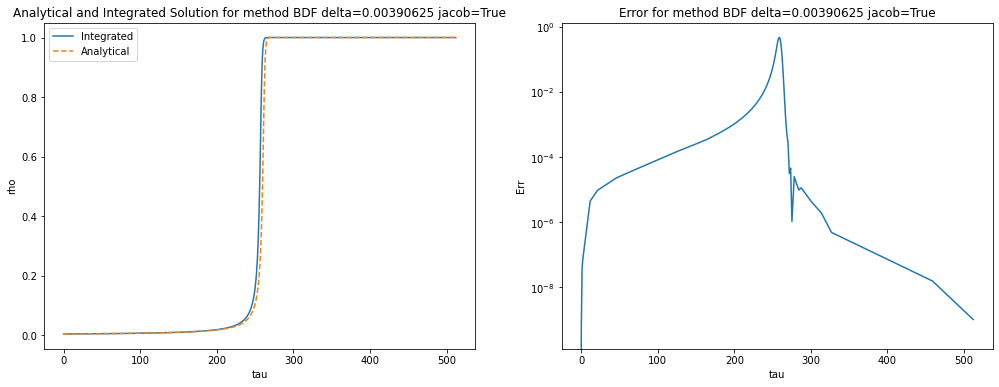

Solution Time = 0.029867172241210938
Number of Eval of RHS = 218
Number of Eval of Jacob = 4
Number of LU Decomp = 15


d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


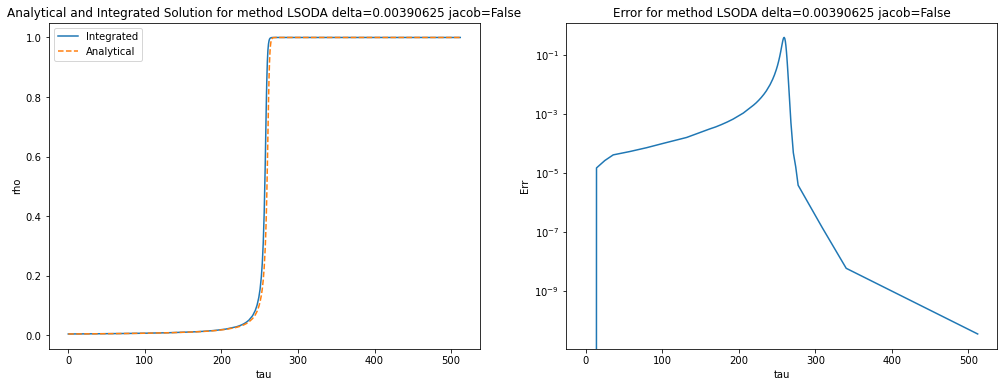

Solution Time = 0.0014929771423339844
Number of Eval of RHS = 133
Number of Eval of Jacob = 3
Number of LU Decomp = 3


d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


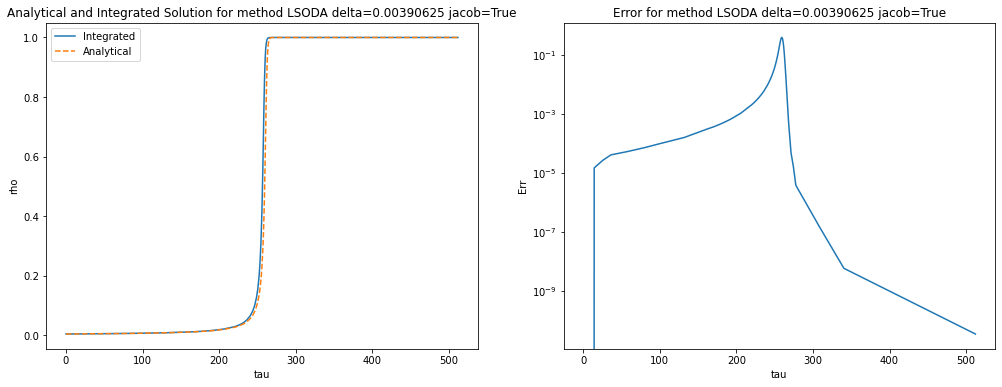

Solution Time = 0.006720066070556641
Number of Eval of RHS = 130
Number of Eval of Jacob = 3
Number of LU Decomp = 3


In [28]:
#First define analytical solution as a function
def analytical_solution(tau, delta):
    a = (1/delta)-1 #Calculate a
    W = lambertw(a*np.exp(a-tau)) #Calculate lambert W function
    return 1/(W+1)

#Define RHS of ODE
def ode_rhs(tau, rho):
    return np.power(rho, 2) - np.power(rho, 3)

#Define Jacobian of RHS of ODE
def jac_ode_rhs(tau, rho):
    return [2*rho - 3*np.power(rho, 2)]

#Parameters of integration
delta = np.power(2.0, -8)
tau_initial = 0 #Initial time
tau_final = 2/delta #Final time
abs_tol = np.power(10.0, -5) #Absolute tolerance

#RK45
method = 'RK45' #Method of Integration

#Integration part with solve_ivp of scipy.integrate
start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol)
end_time = time.time()
#Plotting the results
plot_solution(solution, analytical_solution, delta, method=method, jac=False)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))
 
#BDF
method = 'BDF'

start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=False)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol, jac=jac_ode_rhs)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=True)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

#LSODA
method = 'LSODA'
start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=False)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol, jac=jac_ode_rhs)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=True)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

C:\Users\teyfik can\AppData\Local\Temp\ipykernel_8060\3046002708.py:4: RuntimeWarning: overflow encountered in exp
  W = lambertw(a*np.exp(a-tau)) #Calculate lambert W function
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\teyfik can\AppData\Local\Temp\ipykernel_8060\3046002708.py:4: RuntimeWarning: overflow encountered in exp
  W = lambertw(a*np.exp(a-tau)) #Calculate lambert W function


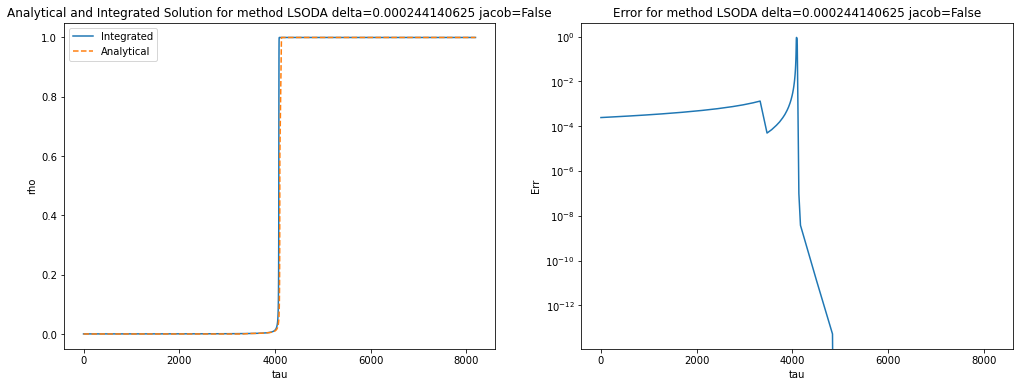

Solution Time = 0.005970954895019531
Number of Eval of RHS = 194
Number of Eval of Jacob = 5
Number of LU Decomp = 5


C:\Users\teyfik can\AppData\Local\Temp\ipykernel_8060\3046002708.py:4: RuntimeWarning: overflow encountered in exp
  W = lambertw(a*np.exp(a-tau)) #Calculate lambert W function
d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\teyfik can\AppData\Local\Temp\ipykernel_8060\3046002708.py:4: RuntimeWarning: overflow encountered in exp
  W = lambertw(a*np.exp(a-tau)) #Calculate lambert W function


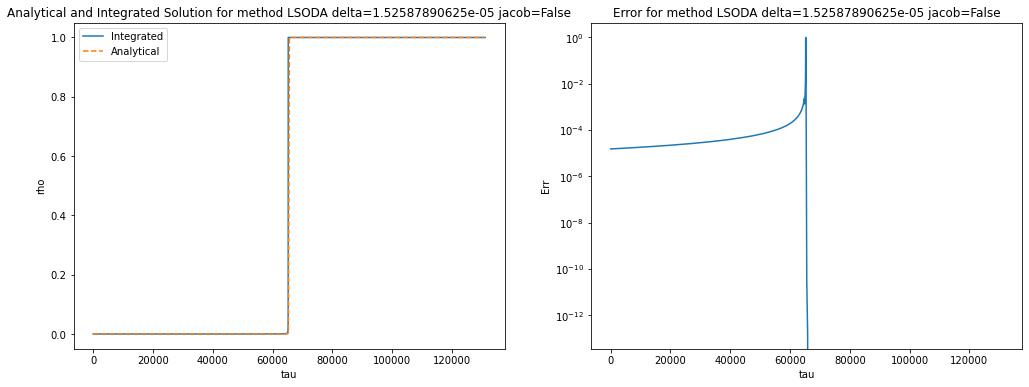

Solution Time = 0.008460283279418945
Number of Eval of RHS = 231
Number of Eval of Jacob = 6
Number of LU Decomp = 6


In [37]:
#Move forward with selected method
#Parameters of integration
delta = np.power(2.0, -12)
tau_initial = 0 #Initial time
tau_final = 2/delta #Final time
abs_tol = np.power(10.0, -15) #Absolute tolerance

method = 'LSODA'
start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=False)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

#Parameters of integration
delta = np.power(2.0, -16)
tau_initial = 0 #Initial time
tau_final = 2/delta #Final time
abs_tol = np.power(10.0, -15) #Absolute tolerance

method = 'LSODA'
start_time = time.time()
solution = solve_ivp(fun=ode_rhs, t_span=(tau_initial, tau_final), y0=[delta], method=method, atol=abs_tol)
end_time = time.time()
plot_solution(solution, analytical_solution, delta, method=method, jac=False)
print('Solution Time = ' + str(end_time-start_time))
print('Number of Eval of RHS = ' + str(solution.nfev))
print('Number of Eval of Jacob = ' + str(solution.njev))
print('Number of LU Decomp = ' + str(solution.nlu))

Part (c):

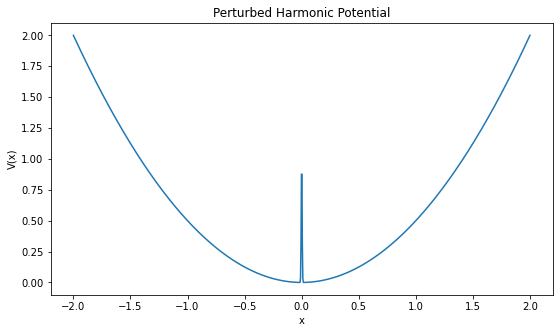

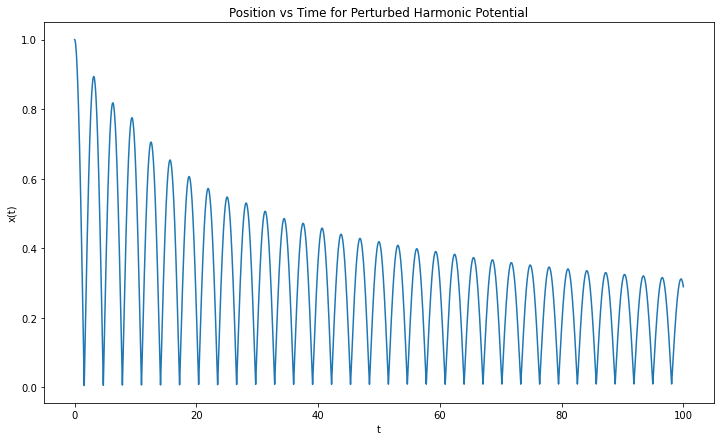

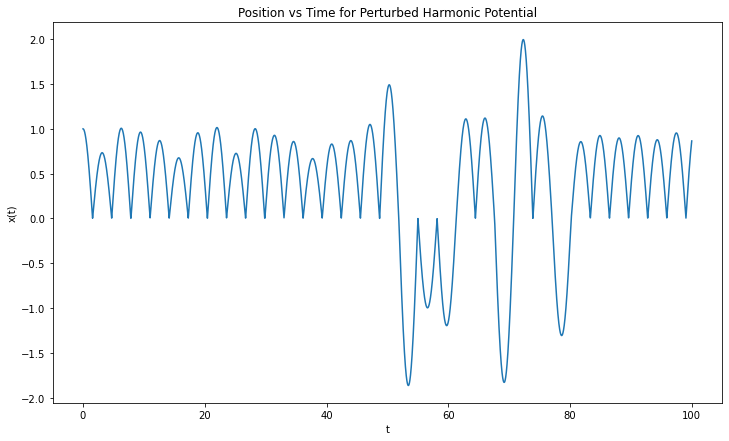

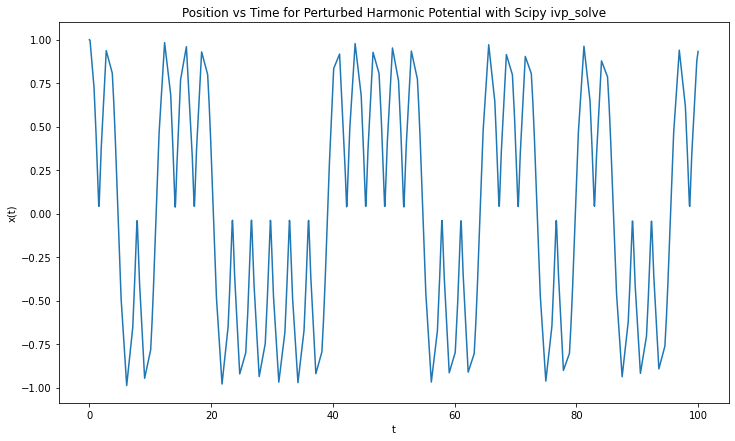

In [18]:
#Simulation Parameters
A = 1
l = np.power(2.0, -8)
omega = 1
t = 0
t_final = 100
dt = 0.01

#Run simulation with plotting potential
ps6_functions.run_pert_harmonic(omega=omega, A=A, l=l, dt=dt, t_final=t_final, show_potential=True)

#Decreased l value for numerical tunelling
ps6_functions.run_pert_harmonic(omega=omega, A=A, l=l/1.7, dt=dt, t_final=t_final)

#Using scipy.integrate.solve_ivp for solution
#Parameters
l = np.power(2.0, -5)

def rhs_pert_harmonic(t, x):
    f = np.zeros(2)
    f[0] = x[1]
    f[1] = -x[0] + (A/np.power(l, 2))*x[0]*np.exp(-np.power(x[0], 2)/(2*np.power(l, 2)))
    return f

#Solve initial value problem
solution = solve_ivp(fun=rhs_pert_harmonic, t_span=(0,t_final), y0=[1, 0])
y = solution.y

#Plot the solution
plt.figure(figsize=(12,7))
plt.plot(solution.t, y[0, :])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Position vs Time for Perturbed Harmonic Potential with Scipy ivp_solve')
plt.show()

